In [5]:
!git clone https://github.com/cvbrandoe/coursTAL.git

Cloning into 'coursTAL'...
remote: Enumerating objects: 524, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 524 (delta 15), reused 0 (delta 0), pack-reused 491
Receiving objects: 100% (524/524), 55.29 MiB | 12.34 MiB/s, done.
Resolving deltas: 100% (196/196), done.
Updating files: 100% (384/384), done.


In [6]:
tm_data = "/content/coursTAL/2023/TMData/"

In [9]:
import re

trump = pd.read_csv('/content/coursTAL/2023/TMData/tweets_01-08-2021.csv')
trump.text = trump.apply(lambda row: re.sub(r"http\S+", "", row.text).lower(), 1)
trump.text = trump.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.text.split())), 1)
trump.text = trump.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.text).split()), 1)
trump = trump.loc[(trump.isRetweet == "f") & (trump.text != ""), :]
tweets = trump.text.to_list()

In [7]:
!pip install top2vec
!pip install top2vec[sentence_transformers]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 33.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3582127 sha256=ee6b964019c96df73f30c88e9bf842c685ff87ff6079a980977a6d7cb8ff9627
  Stored in directory: /root/.cache/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=9a20641e153229e108e08f912f6f2427deb21ce053e04bdc776c41dfd386d71f
  Stored in dire

In [10]:
from top2vec import Top2Vec

model = Top2Vec(tweets)

2023-03-29 12:26:30,259 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-03-29 12:26:32,809 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-03-29 12:29:34,332 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-03-29 12:30:53,359 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-03-29 12:30:58,438 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [11]:
topic_sizes, topic_nums = model.get_topic_sizes()

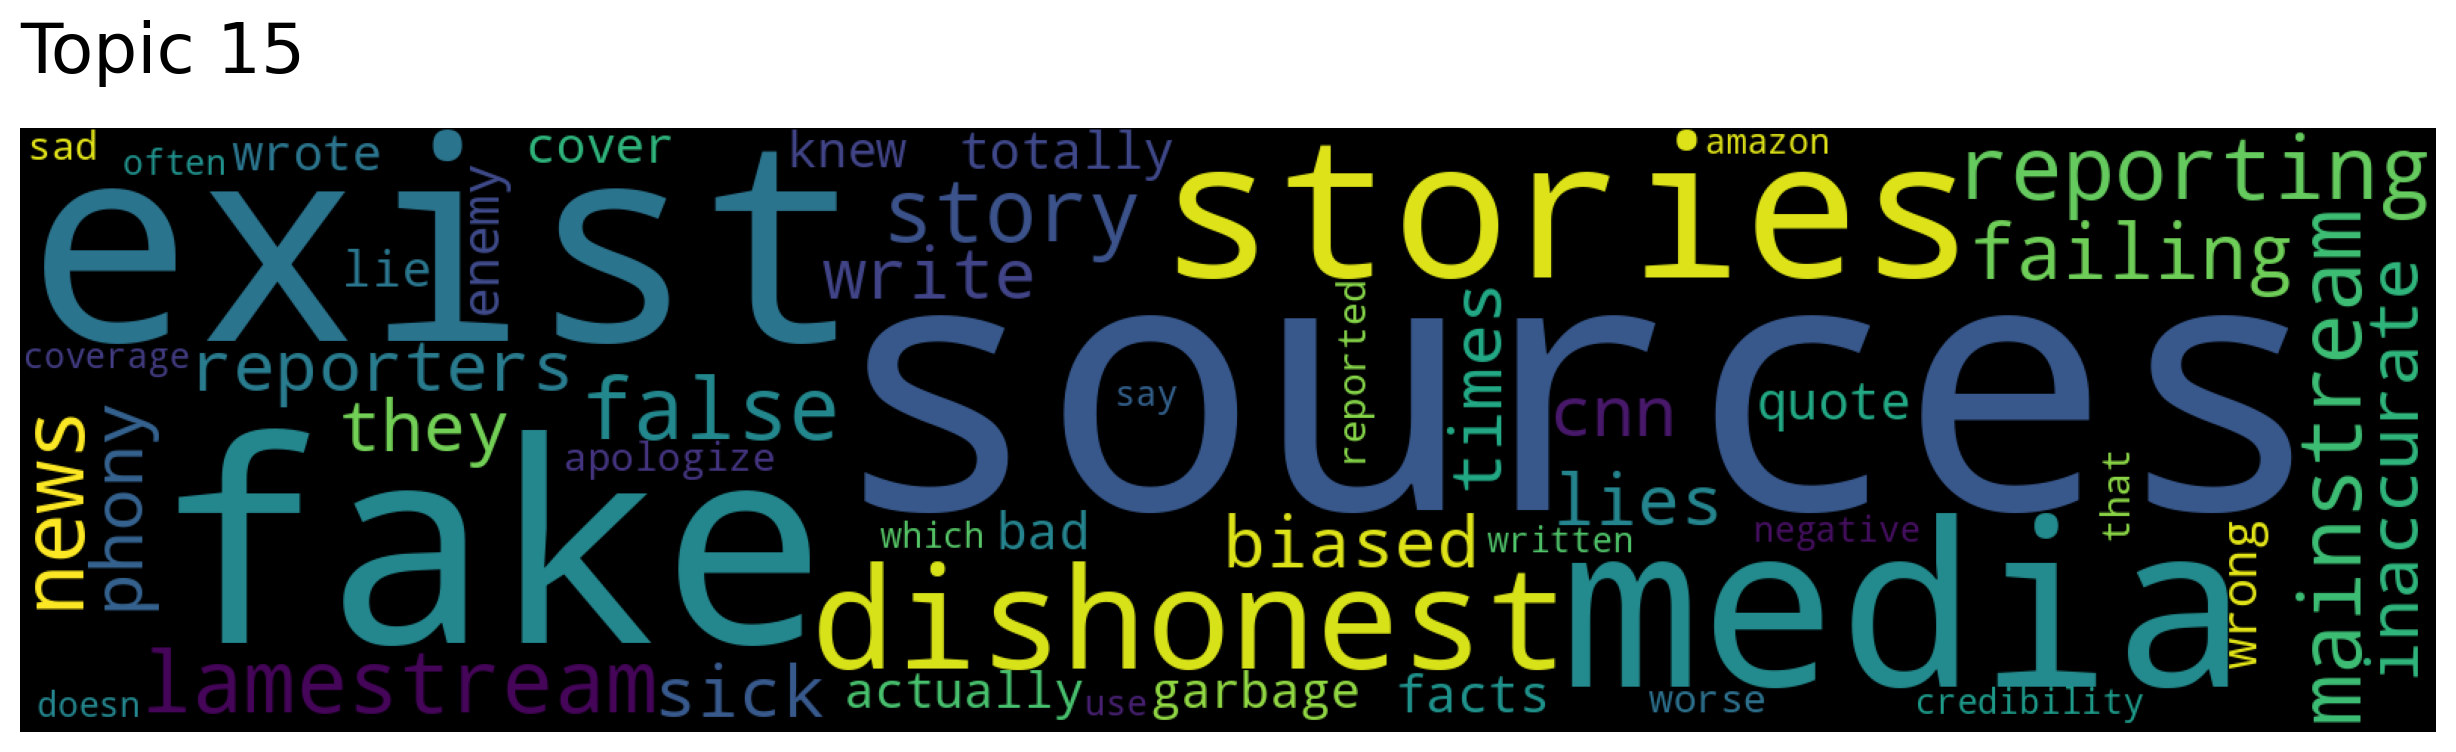

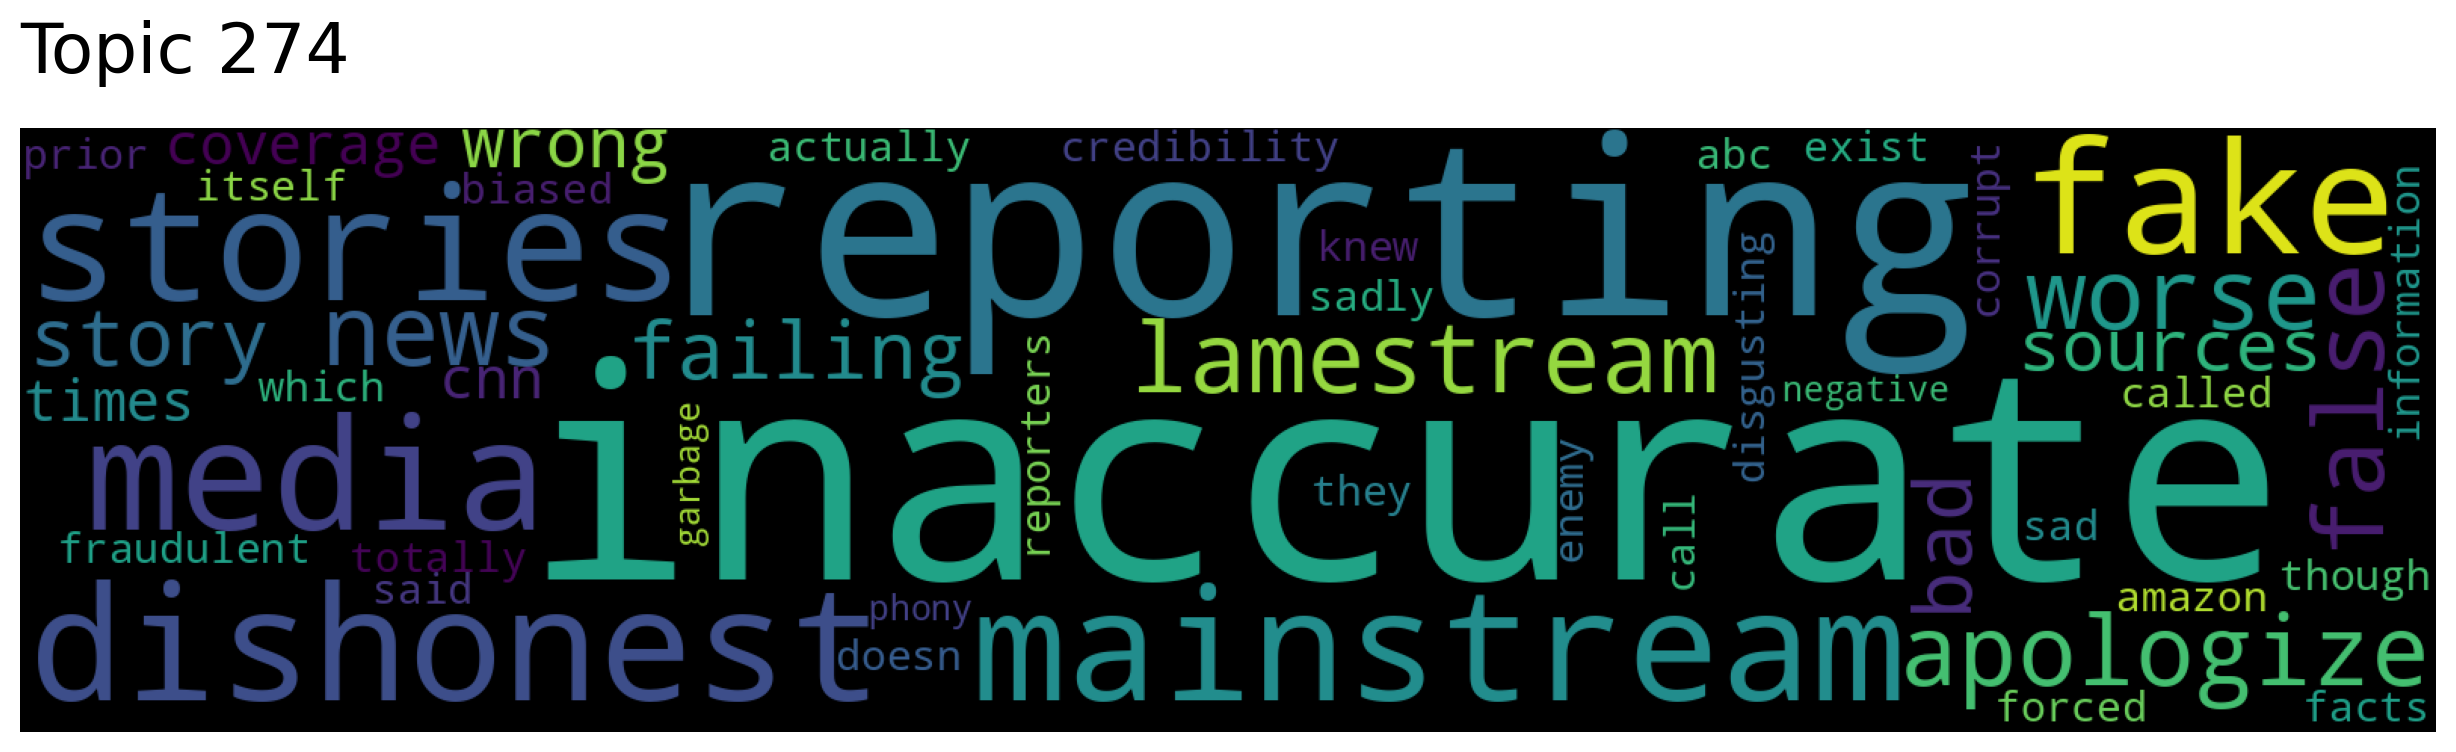

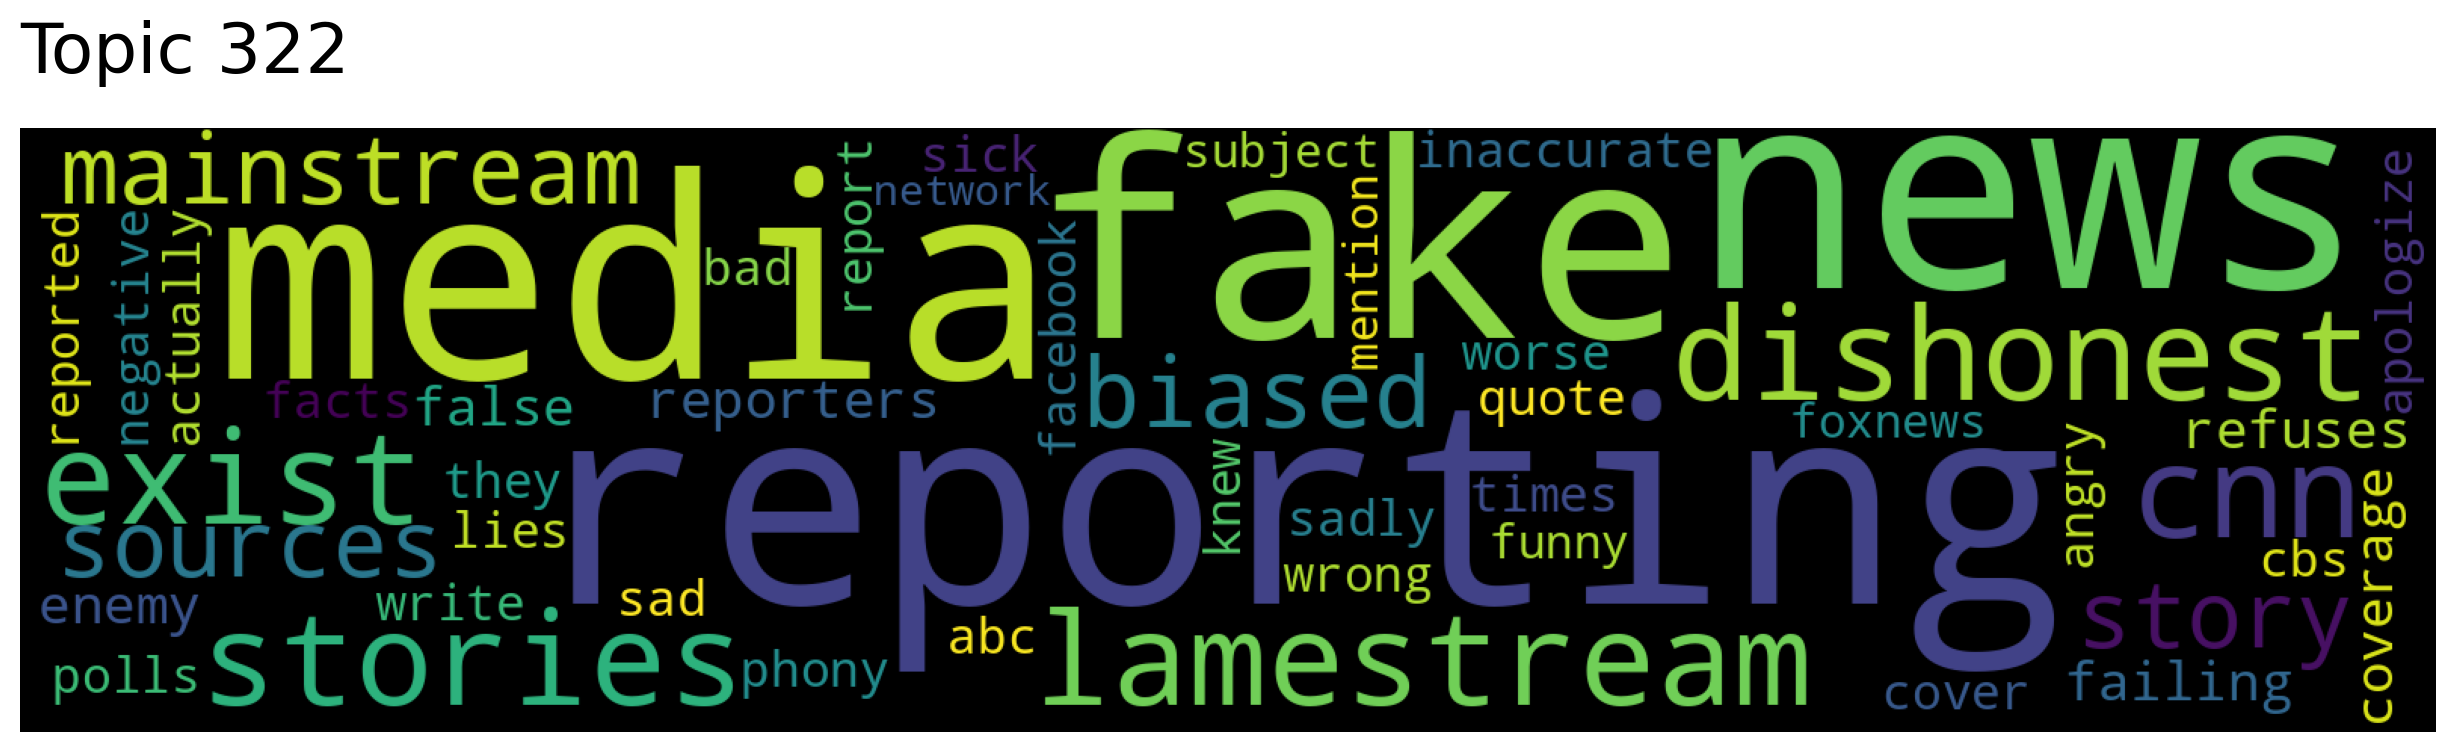

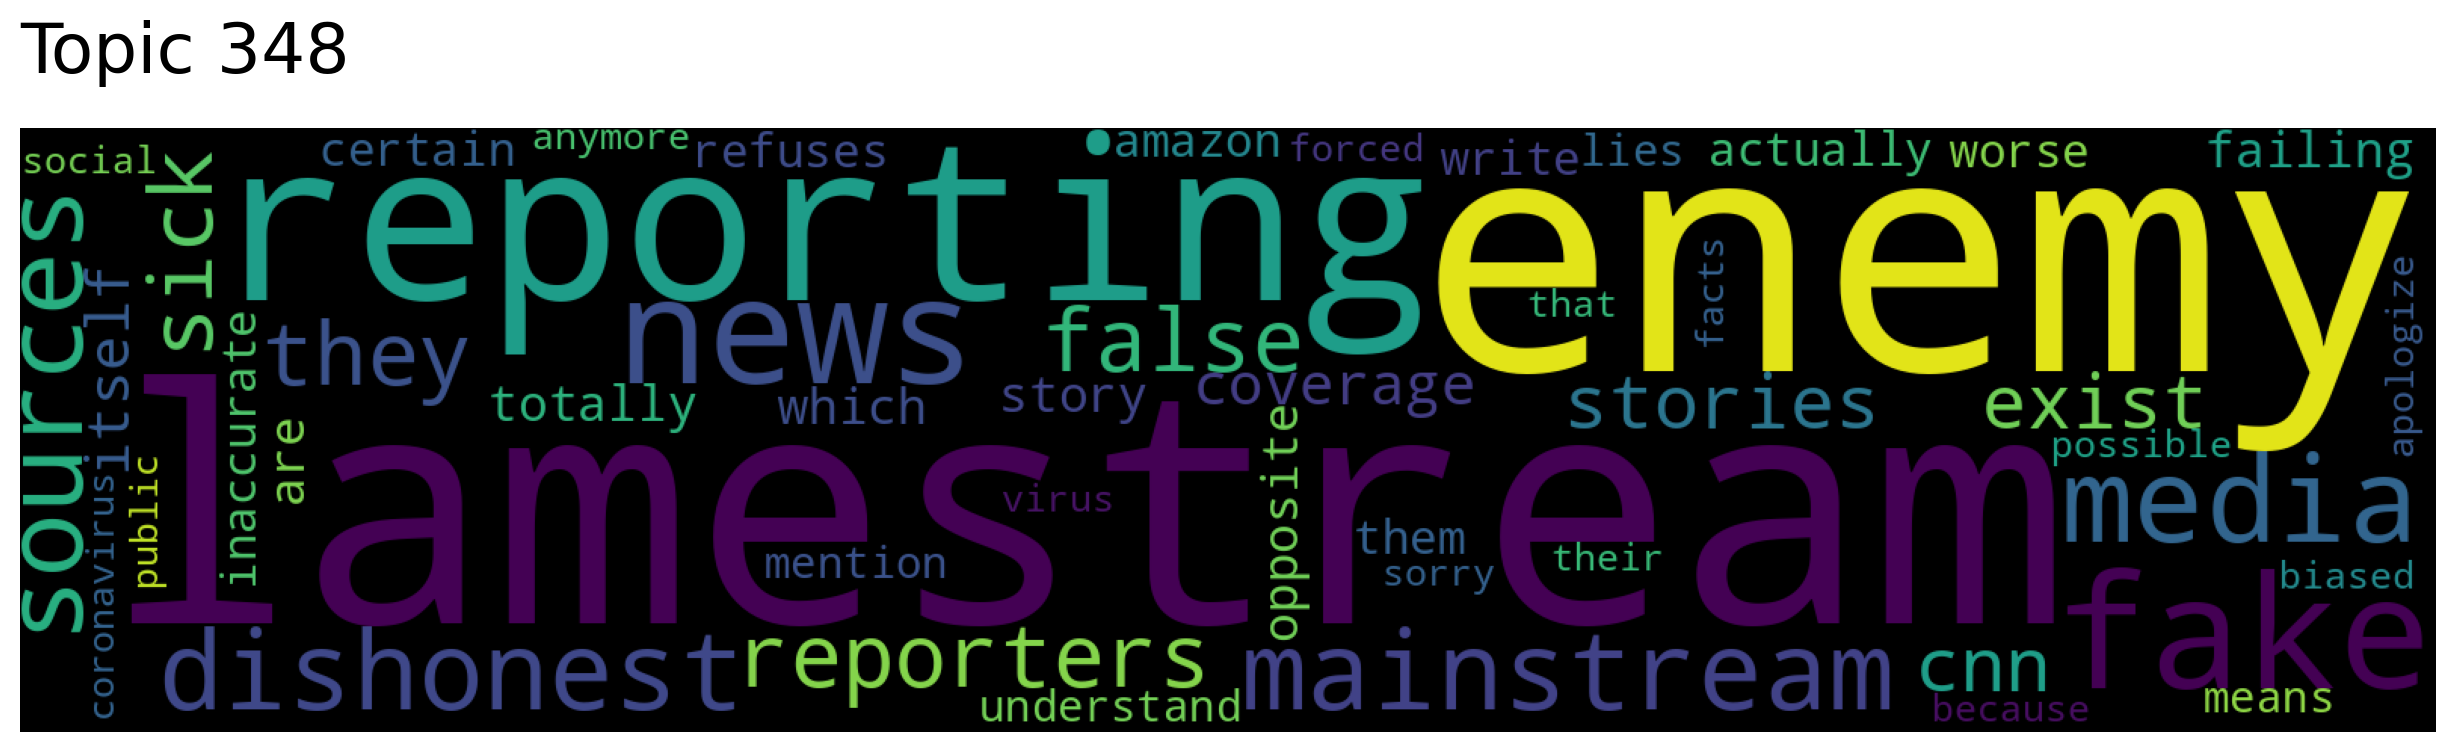

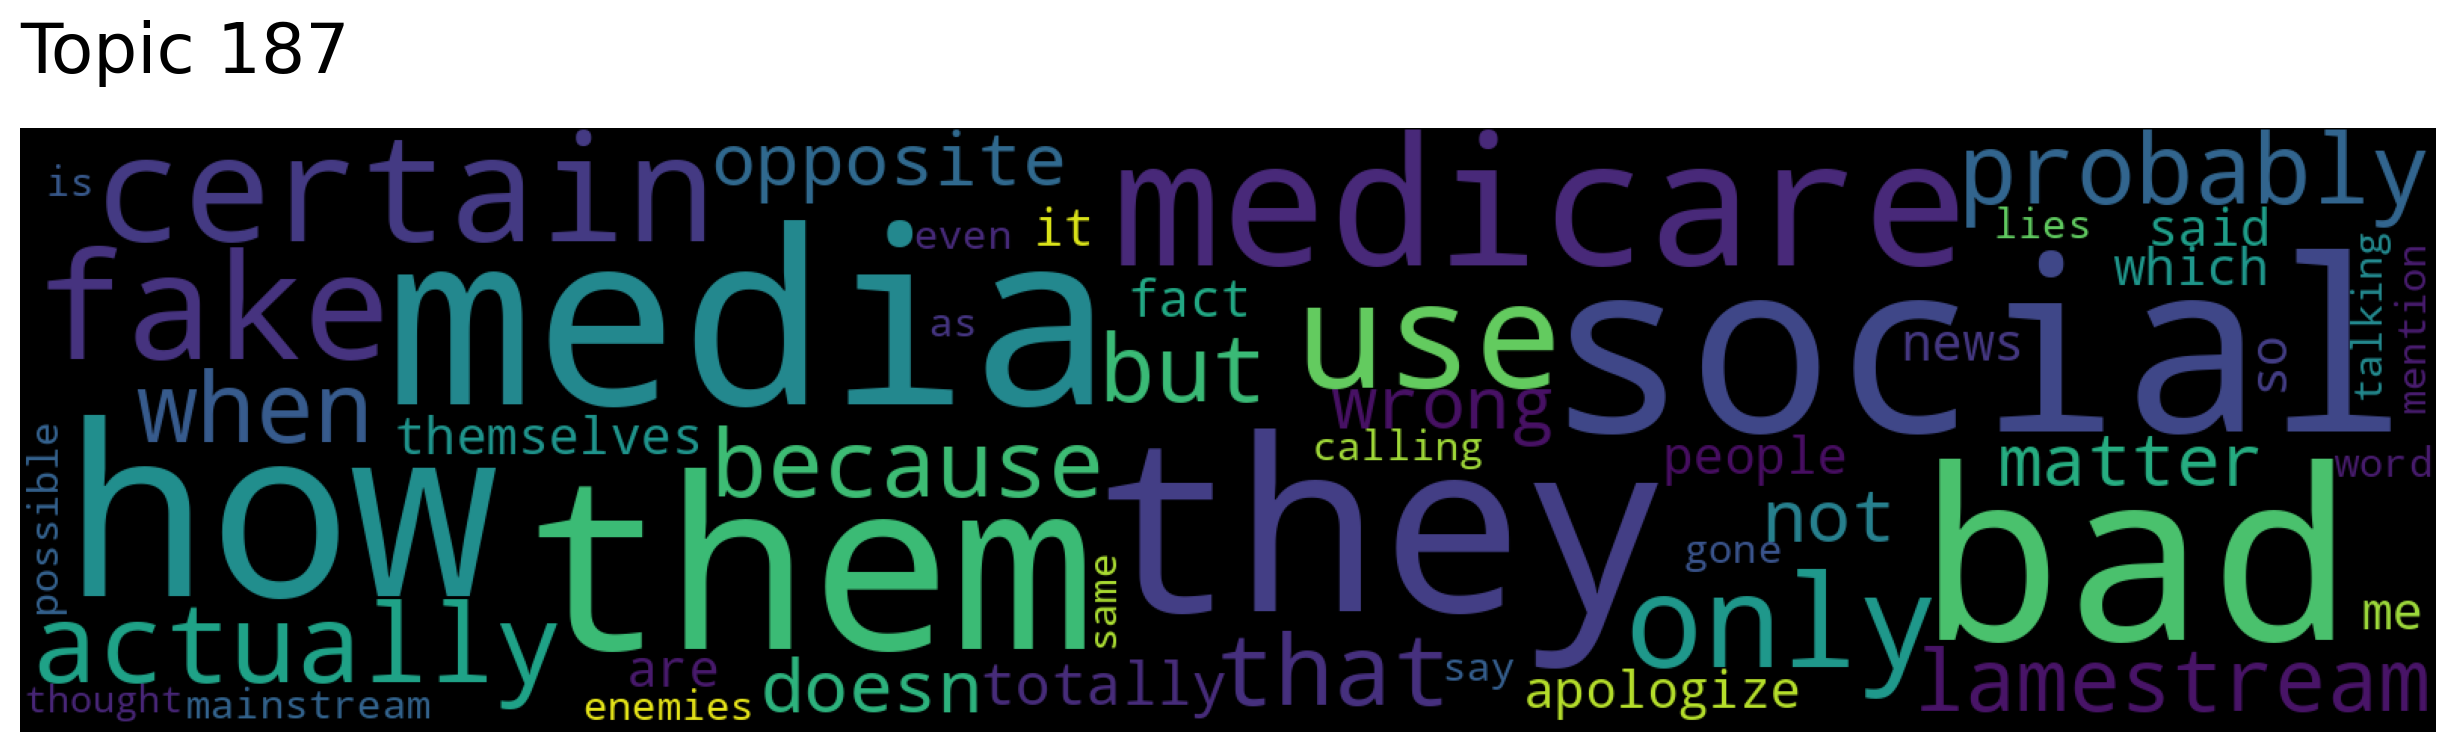

In [13]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["media"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)